In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates

set all necessary paths

In [16]:
path_timeseries='path to GIV monthly time-series data (csv files)'
path_climate='path to KNMI monthly climate data'


read in climate data (temperature or precipitation) and split to years 2000 to 2021

In [23]:
# either use temperature or precipitation 
#file = 'iera5_tp_-159.4307355179E_56.2055350315N_n_su.dat.txt'
file = 'iera5_t2m_-159.4307355179E_56.2055350315N_n_su.dat.txt'

path_climate_join=os.path.join(path_climate,file)

data_climate=pd.read_csv(path_climate_join,sep='\s+',skiprows=20,names=['year','January','February','March',
                                                              'April','May','June','July','August',
                                                              'September','October','November','December'])

data_climate=data_climate.set_index('year')
data_climate_split = data_climate.loc[2000:2021,:]


print(data_climate_split)

        January  February      March     April       May      June       July  \
year                                                                            
2000 -11.798310 -2.684387  -3.196442 -3.201141 -0.388397  5.713165   8.660004   
2001  -4.935699 -3.059326  -4.550110 -1.589722 -0.863007  6.742584   9.474701   
2002  -4.457611 -7.037689  -3.321075 -1.329071  2.458771  7.436920   9.592102   
2003  -2.683533 -0.966553  -7.126526 -1.066559  1.674408  7.026886  10.201540   
2004  -8.974030 -3.083618  -6.323914 -2.183746  3.699066  7.413361  11.105380   
2005  -2.091217 -4.252350  -3.206696 -3.107086  3.551819  8.050720   9.441467   
2006 -10.628230 -5.216034  -4.756500 -3.794952  1.514069  6.150421   9.331390   
2007  -7.848907 -3.614349 -12.684840 -0.984161  0.560486  4.856354   8.837128   
2008  -7.961395 -9.906616  -7.604065 -3.491272  0.188263  5.071075   7.671783   
2009  -8.914703 -6.053131  -7.876373 -2.636139  2.600403  6.363342   9.664703   
2010  -7.314056 -6.077728  -

re-format 'data_climate_split' into a list 'target_format'

In [24]:
years=np.arange(2000,2022)

months=['January','February','March','April','May','June','July','August',
        'September','October','November','December']
target_format = []

for year in years:
    for month in months:
        value = data_climate_split.loc[year][month]
        if value != -999.9:
            target_format.append(value)
            
            
print(target_format)

[-11.79831, -2.684387, -3.196442, -3.201141, -0.3883972, 5.713165, 8.660003999999999, 9.143555000000001, 6.0271300000000005, 0.1471863, -1.4555360000000002, -1.296967, -4.935699, -3.059326, -4.55011, -1.5897219999999999, -0.8630065999999998, 6.742584, 9.474701, 9.648285000000001, 5.649567, -1.371613, -4.092316, -8.675628999999999, -4.457611, -7.037689, -3.321075, -1.329071, 2.458771, 7.43692, 9.592102, 10.27017, 6.491272, 3.77536, -0.7768555, -5.784821, -2.683533, -0.9665527, -7.126525999999999, -1.066559, 1.6744080000000001, 7.026886, 10.20154, 10.30045, 6.247284, 1.1578979999999999, -1.9454650000000002, -6.135895, -8.97403, -3.083618, -6.323914, -2.1837459999999997, 3.699066, 7.413361, 11.10538, 11.7319, 6.856354, 2.3928830000000003, -2.671234, -4.124542, -2.091217, -4.25235, -3.206696, -3.1070860000000002, 3.551819, 8.05072, 9.441467, 10.71268, 7.2981869999999995, 0.2514038, -6.9462589999999995, -3.3873900000000003, -10.62823, -5.216034, -4.7565, -3.794952, 1.514069, 6.150421, 9.331

do the plotting and fit a polynomial to see the temperature trend

(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 8 Text yticklabel objects>)

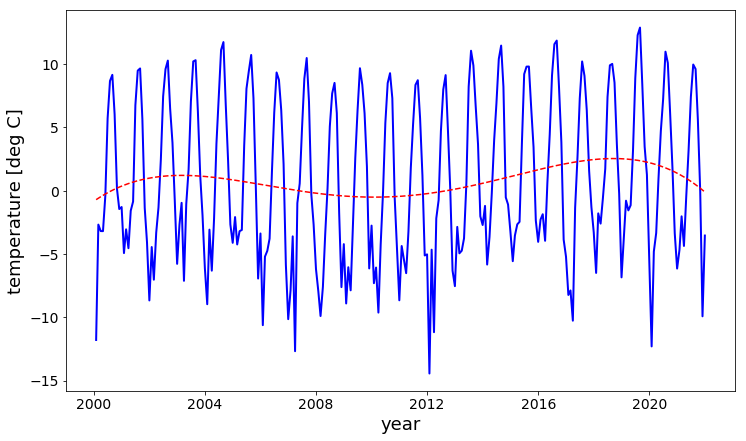

In [25]:
fig,ax=plt.subplots(figsize=(12,7))
#ax.plot(date_range,target_format,color='b',linewidth=2)
date_range = pd.date_range(start='1/1/2000', end='31/12/2021',freq='M')

x_num = dates.date2num(date_range)

ax.plot(date_range,target_format,color='b',linewidth=2)


z = np.polyfit(x_num,target_format, 4)
p = np.poly1d(z)
p_eval = np.poly1d(z)(x_num)
plt.plot(date_range,p(x_num),"r--")

ax.set_xlabel('year',fontsize=18)
plt.xticks(fontsize=14)
ax.set_ylabel('temperature [deg C]',fontsize=18)
plt.yticks(fontsize=14)

#print(z)